In [2]:
from traffic.core import Traffic

In [3]:
t_5_10 = Traffic.from_file("../data/samples/t_5_10_dep_arr.pkl")

In [17]:
from traffic.algorithms.douglas_peucker import douglas_peucker

In [38]:
from traffic.core import Flight

In [27]:
t_5_10 = Traffic.from_file("../data/samples/t_5_10_dep_arr.pkl")

# Will it work on all flights ?

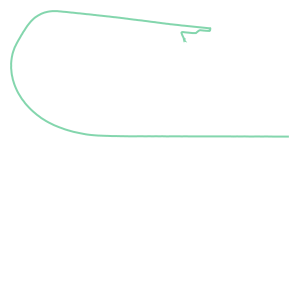

In [73]:
t_5_10[15].first("15T")

In [74]:
taxi_dist(t_5_10[15].onground()), angle_sum(t_5_10[15].onground())

(0.0, 587.3938019327065)

In [75]:
f=t_5_10[15]

In [80]:
f=f.onground()
f_mask = douglas_peucker(
    df=f.data, tolerance=15, lat="latitude", lon="longitude"
)
f_simplified = Flight(f.data.loc[f_mask])

f_simplified.cumulative_distance().map_leaflet(zoom=13)


Map(center=[47.45505280340398, 8.560965464665339], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [89]:
import pandas as pd
import numpy as np

In [90]:
from traffic.core import geodesy as geo


In [135]:

def angle_sum(f, tolerance=15):
    f=f.onground()
    if f is None or len(f) < 3:
        return None
    try:
        f_mask = douglas_peucker(
            df=f.data, tolerance=tolerance, lat="latitude", lon="longitude"
        )
    except RecursionError:
        print(f"Problem for douglas_peucker in angle sum for {f.flight_id}")
        return None
    f_simplified = Flight(f.data.loc[f_mask])
    return (
        f_simplified.cumulative_distance()
        .unwrap("compute_track")
        .diff("compute_track_unwrapped")
        .data.compute_track_unwrapped_diff.abs()
        .sum()
    )

def cumdist_ground(f):
    f=f.onground()
    if f is None:
        return None
    try:
        f_mask = douglas_peucker(
            df=f.data, tolerance=15, lat="latitude", lon="longitude"
        )
    except RecursionError:
        print(f"Problem for douglas_peucker in angle sum for {f.flight_id}")
        return None
    f_data=f.data.loc[f_mask]
    f_simplified = Flight(f_data)
    coords= f_simplified.sort_values('timestamp').data[["timestamp", "latitude", "longitude"]].dropna()
    if len(coords) < 2:
        return None
    df=pd.DataFrame()
    for i in range(len(coords)-1):
        t = coords.iloc[i+1].timestamp
        lat1, lon1 = coords.iloc[i].latitude, coords.iloc[i].longitude
        lat2, lon2 = coords.iloc[i+1].latitude, coords.iloc[i+1].longitude
        d=geo.distance(lat1, lon1, lat2, lon2)
        df=df.append({'timestamp':t, 'dist':d}, ignore_index=True)
    return df.dist.sum()

In [136]:
df = pd.DataFrame()
for f in t_5_10:
    df = df.append({'flight_id':f.flight_id, 'dist':cumdist_ground(f), 'angle':angle_sum(f)}, ignore_index=True)
    
df.head()

/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),
/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),
/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),
/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),
/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),


Problem for douglas_peucker in angle sum for SWR61D_10825
Problem for douglas_peucker in angle sum for SWR61D_10825
Problem for douglas_peucker in angle sum for SWR789_10293
Problem for douglas_peucker in angle sum for SWR789_10293


/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),
/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),
/home/service/miniconda3/envs/traffic/lib/python3.9/site-packages/traffic/algorithms/douglas_peucker.py:20: RuntimeWarning: invalid value encountered in true_divide
  v / np.sqrt(np.sum(v * v)),


,angle,dist,flight_id
0,346.382672,2733.718370,AAL92_20624
1,238.717538,3016.901080,AAL93_20327
2,318.995773,2053.651245,ACA802_20935
3,404.108357,3555.462901,ACA803_20632
4,355.301148,2868.748710,ACA878_20874


<AxesSubplot:>

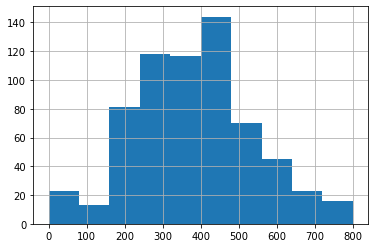

In [142]:
df.angle.hist(range=(0,800))

In [167]:
df.query('angle>1000').shape

(39, 3)

<AxesSubplot:>

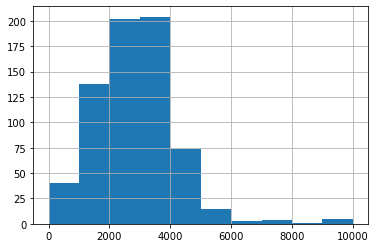

In [166]:
df.dist.hist(range=(0,10000))

In [168]:
df.query('dist>10000').shape

(18, 3)

In [180]:
df.query('dist>10000').sample()

,angle,dist,flight_id
112,293.333456,1.900633e+06,EDW285C_7940


In [181]:
t_5_10['EDW285C_7940'].onground().map_leaflet(zoom=10)

Map(center=[47.402870032928526, 8.436482754853943], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [179]:
t_5_10['HBLVC_18065'].first("10T").map_leaflet(zoom=13)

Map(center=[47.66232863733324, 9.129812299288236], controls=(ZoomControl(options=['position', 'zoom_in_text', …

# DEBUG PB

In [41]:
t_5_10['AEA95HN_438'].onground().data

,alert,altitude,callsign,day,destination,firstseen,geoaltitude,groundspeed,hour,icao24,...,longitude,onground,origin,spi,squawk,timestamp,track,vertical_rate,flight_id,twy
339069,True,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,NaN,True,LSZH,False,NaN,2019-10-05 09:33:09+00:00,NaN,NaN,AEA95HN_438,NaN
339070,True,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,NaN,True,LSZH,False,NaN,2019-10-05 09:33:10+00:00,NaN,NaN,AEA95HN_438,NaN
339071,True,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,NaN,True,LSZH,False,NaN,2019-10-05 09:33:11+00:00,NaN,NaN,AEA95HN_438,NaN
339072,True,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,NaN,True,LSZH,False,NaN,2019-10-05 09:33:12+00:00,NaN,NaN,AEA95HN_438,NaN
339073,True,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,8.556925,True,LSZH,False,3071.0,2019-10-05 09:33:13+00:00,NaN,NaN,AEA95HN_438,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339774,False,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,8.570023,True,LSZH,False,3071.0,2019-10-05 09:44:54+00:00,NaN,NaN,AEA95HN_438,NaN
339775,False,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,8.570023,True,LSZH,False,3071.0,2019-10-05 09:44:55+00:00,NaN,NaN,AEA95HN_438,NaN
339776,False,1375.0,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,8.570023,True,LSZH,False,3071.0,2019-10-05 09:44:56+00:00,NaN,NaN,AEA95HN_438,NaN
339777,False,NaN,AEA95HN,1570233600,LEMD,2019-10-05 09:33:32+00:00,NaN,NaN,1570266000,343495,...,8.569319,True,LSZH,False,3071.0,2019-10-05 09:44:57+00:00,NaN,NaN,AEA95HN_438,NaN


In [62]:
def debug_pb(f, tolerance=15):
    og = f.onground()
    display(og.map_leaflet(zoom=15))
    f_mask = douglas_peucker(df=og.data,tolerance=tolerance, lat='latitude', lon='longitude')
    f_simplified = Flight(og.data.loc[f_mask])
    display(f_simplified.map_leaflet(zoom=15))
    

In [63]:
debug_pb(t_5_10['AEA95HN_438'], tolerance=50)

Map(center=[47.45554237257657, 8.562914893631842], controls=(ZoomControl(options=['position', 'zoom_in_text', …

Map(center=[47.455585956573486, 8.56357895410978], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [48]:
debug_pb(t_5_10['AEA95HN_438'])

Map(center=[47.45554237257657, 8.562914893631842], controls=(ZoomControl(options=['position', 'zoom_in_text', …

Map(center=[47.45546961638886, 8.562602153191198], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [61]:
debug_pb(t_5_10['AEA32XW_384'], tolerance=50)

Map(center=[47.45374067878734, 8.559267860821505], controls=(ZoomControl(options=['position', 'zoom_in_text', …

Map(center=[47.45480437197928, 8.562142738929161], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [60]:
debug_pb(t_5_10['SXS4FA_19556'], tolerance=50)

Map(center=[47.458252135143596, 8.564470214435165], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Map(center=[47.4584785165856, 8.56227769956484], controls=(ZoomControl(options=['position', 'zoom_in_text', 'z…

In [59]:
debug_pb(t_5_10['EDW146Z_5711'], tolerance=50)

Map(center=[47.455331717226386, 8.560773615187845], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Map(center=[47.456799932792364, 8.55948624244103], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [146]:
t_5_10['GSW6028_15744'].

Map(center=[47.45695449968795, 8.557434321208413], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [149]:
debug_pb(t_5_10['SWR646_12082'], tolerance=50)

Map(center=[47.454160808196846, 8.560534126281736], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Map(center=[47.453235623554185, 8.560235880683067], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [66]:
debug_pb(t_5_10['EWG7WP_213'], tolerance=50)

AttributeError: 'NoneType' object has no attribute 'onground'

In [69]:
t_5_10['EWG7WP_2136']

NameError: name 'dep_arr_df' is not defined